In [1]:
import pandas as pd

In [2]:
patients = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR-7XJW0HoiGBhz9Yq2wkTZsI6e_Ckn8co_MJkvyu5xcG-nvJEKzoFkU6NBcgQ0ZI_dzFmcYMnVklHW/pub?output=csv',
                      ).set_index('Patient')

In [3]:
patients_attributes = patients.to_dict(orient='index')

In [4]:
connections = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR-7XJW0HoiGBhz9Yq2wkTZsI6e_Ckn8co_MJkvyu5xcG-nvJEKzoFkU6NBcgQ0ZI_dzFmcYMnVklHW/pub?gid=1171371621&single=true&output=csv')

In [5]:
connections

,Patient1,Patient2,Interaction_Date,Interaction_Place
0,1561,1552,2021-01-25,Hải Phòng
1,1562,1553,NaN,Quảng Ninh
2,1563,1553,NaN,Quảng Ninh
3,1564,1553,NaN,Quảng Ninh
4,1566,1553,NaN,Quảng Ninh
5,1567,1553,NaN,Quảng Ninh
6,1568,1553,NaN,Quảng Ninh
7,1569,1553,NaN,Quảng Ninh
8,1570,1553,NaN,Quảng Ninh
9,1571,1553,NaN,Quảng Ninh


In [6]:
import networkx
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from bokeh.io import output_notebook, show, save

In [33]:
output_notebook()

Loading BokehJS ...

In [34]:
G = networkx.from_pandas_edgelist(connections, 'Patient1', 'Patient2',  edge_attr=True)

In [35]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap
from bokeh.models import EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet

In [36]:
HOVER_TOOLTIPS = [("Patient", "@index"), ("Degree", "@degree"), ("Confirmed_Date", "@Confirmed_Date")]


In [37]:
dict(patients.Confirmed_Date)

{1552: '2021-01-27',
 1553: '2021-01-27',
 1561: '2021-01-29',
 1562: '2021-01-28',
 1563: '2021-01-28',
 1564: '2021-01-28',
 1566: '2021-01-28',
 1567: '2021-01-28',
 1568: '2021-01-28',
 1569: '2021-01-28',
 1570: '2021-01-28',
 1571: '2021-01-28',
 1572: '2021-01-28',
 1573: '2021-01-29',
 1574: '2021-01-29',
 1979: '2021-02-06',
 2002: '2021-02-09',
 2004: '2021-02-09',
 2005: '2021-02-09',
 2006: '2021-02-09',
 2003: '2021-02-09',
 2065: '2021-02-09',
 2018: '2021-02-09',
 2025: '2021-02-09',
 2026: '2021-02-09',
 2014: nan,
 2015: nan,
 2016: nan}

In [38]:
networkx.set_node_attributes??

In [39]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)
#networkx.set_node_attributes(G, name='Confirmed_Date', values=dict(patients.Confirmed_Date))
networkx.set_node_attributes(G, values=patients_attributes)
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in networkx.degree(G)])
networkx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

In [41]:
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'
color_palette = Blues8

#Choose colors for node and edge highlighting
node_highlight_color = 'white'
edge_highlight_color = 'black'

plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,box_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title="Covid VN network")
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node size and color
minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size='adjusted_node_size', 
                                           fill_color=linear_cmap(color_by_this_attribute, 
                                                                  color_palette, minimum_value_color, 
                                                                  maximum_value_color))
#Set node highlight colors
network_graph.node_renderer.hover_glyph = Circle(size=size_by_this_attribute, 
                                                 fill_color=node_highlight_color, line_width=2)
network_graph.node_renderer.selection_glyph = Circle(size=size_by_this_attribute, 
                                                     fill_color=node_highlight_color, line_width=2)


#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)
#Set edge highlight colors
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

#Highlight nodes and edges
network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()


#Add network graph to the plot
plot.renderers.append(network_graph)

#Add Labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'patient': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='patient', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7)
plot.renderers.append(labels)


show(plot)
#save(plot, filename=f"{title}.html")

In [26]:
G.nodes

NodeView((1561, 1552, 1562, 1553, 1563, 1564, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 2002, 1979, 2004, 2005, 2006, 2003, 2065, 2018, 2025, 2026, 2014, 2015, 2016))

In [27]:
G.edges

EdgeView([(1561, 1552), (1562, 1553), (1553, 1563), (1553, 1564), (1553, 1566), (1553, 1567), (1553, 1568), (1553, 1569), (1553, 1570), (1553, 1571), (1553, 1572), (1553, 1573), (1553, 1574), (2002, 1979), (1979, 2004), (1979, 2005), (1979, 2006), (1979, 2003), (1979, 2065), (1979, 2018), (1979, 2025), (1979, 2026), (2003, 2014), (2003, 2015), (2003, 2016)])

In [28]:
G[1561][1552]

{'Patient1': 1561,
 'Patient2': 1552,
 'Interaction_Date': '2021-01-25',
 'Interaction_Place': 'Hải Phòng'}

In [29]:
networkx.to_pandas_edgelist(G)

,source,target,Patient2,Interaction_Date,Interaction_Place,Patient1
0,1561,1552,1552,2021-01-25,Hải Phòng,1561
1,1562,1553,1553,NaN,Quảng Ninh,1562
2,1553,1563,1553,NaN,Quảng Ninh,1563
3,1553,1564,1553,NaN,Quảng Ninh,1564
4,1553,1566,1553,NaN,Quảng Ninh,1566
5,1553,1567,1553,NaN,Quảng Ninh,1567
6,1553,1568,1553,NaN,Quảng Ninh,1568
7,1553,1569,1553,NaN,Quảng Ninh,1569
8,1553,1570,1553,NaN,Quảng Ninh,1570
9,1553,1571,1553,NaN,Quảng Ninh,1571


In [30]:
networkx.from_pandas_edgelist

<function networkx.convert_matrix.from_pandas_edgelist(df, source='source', target='target', edge_attr=None, create_using=None)>

In [31]:
new_G = networkx.from_pandas_edgelist(connections, 'Patient1', 'Patient2', edge_attr=True)

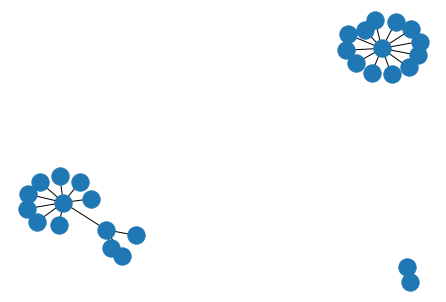

In [32]:
networkx.draw(new_G)